# Calculating the Normalized Difference Vegetation Index

#### Importing Packages

In [4]:
import rasterio                      #For .hdf Processing and Vizualization
import matplotlib                    #For Plotting Stylization
import numpy as np                   #For Calulations
import matplotlib.pyplot as plt      #For Plotting
import matplotlib.patches as patches #For Image Overlays
import gdal                          #This is for using hdf files

#### Graph Formatting

In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14 #Setting Figure Size in first dimension
fig_size[1] = 10 #Setting Figure Size in second dimension
plt.rcParams["figure.figsize"] = fig_size #Applying the parameters

font = {'family':'Times New Roman', #Setting the font characteristics
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #Applying the font

#### Importing Files

In [6]:
filename = 'NDVItest.tif'
with rasterio.open(filename) as src:
    band_red = src.read(3)
with rasterio.open(filename) as src:
    band_nir = src.read(4)

RasterioIOError: NDVItest.tif: No such file or directory

In [20]:
numpy.seterr(divide='ignore', invalid='ignore') # Do not display error when divided by zero 

# NDVI 
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

print(numpy.nanmin(ndvi)) 
print(numpy.nanmax(ndvi))

# get the metadata of original GeoTIFF:
meta = src.meta
print(meta)

# get the dtype of our NDVI array:
ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

# set the source metadata as kwargs we'll use to write the new data:
kwargs = meta

# update the 'dtype' value to match our NDVI array's dtype:
kwargs.update(dtype=ndvi_dtype)

# update the 'count' value since our output will no longer be a 4-band image:
kwargs.update(count=1)

# Finally, use rasterio to write new raster file 'data/ndvi.tif':
with rasterio.open('ndvi3.tif', 'w', **kwargs) as dst:
        dst.write(ndvi, 1)
        
from matplotlib import colors


class MidpointNormalize(colors.Normalize):
   
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
       
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

-0.55
0.5614035087719298
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 4377, 'height': 2312, 'count': 4, 'crs': CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(1.0, 0.0, 457163.0,
       0.0, -1.0, 4426952.0)}
float64


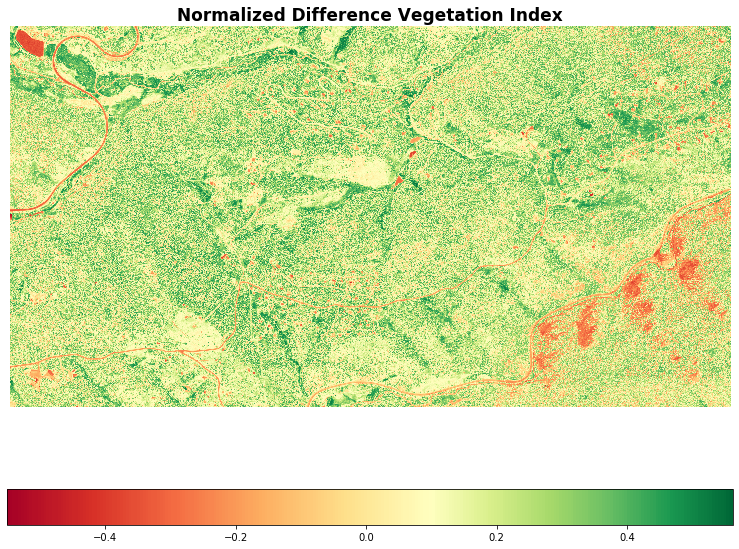

In [21]:
# Set min/max values from NDVI range for image

min=numpy.nanmin(ndvi)
max=numpy.nanmax(ndvi)

# Set our custom midpoint for most effective NDVI analysis
mid=0.1

# Setting color scheme ref:https://matplotlib.org/users/colormaps.html as a reference
colormap = plt.cm.RdYlGn 
norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
fig = plt.figure(figsize=(20,10))


ax = fig.add_subplot(111)

# Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
cbar_plot = ax.imshow(ndvi, cmap=colormap, vmin=min, vmax=max, norm=norm)


# Turn off the display of axis labels 
ax.axis('off')

# Set a title 
ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

# Configure the colorbar
cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

# Call 'savefig' to save this plot to an image file
fig.savefig("ndvi-image3.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# let's visualize
plt.show()



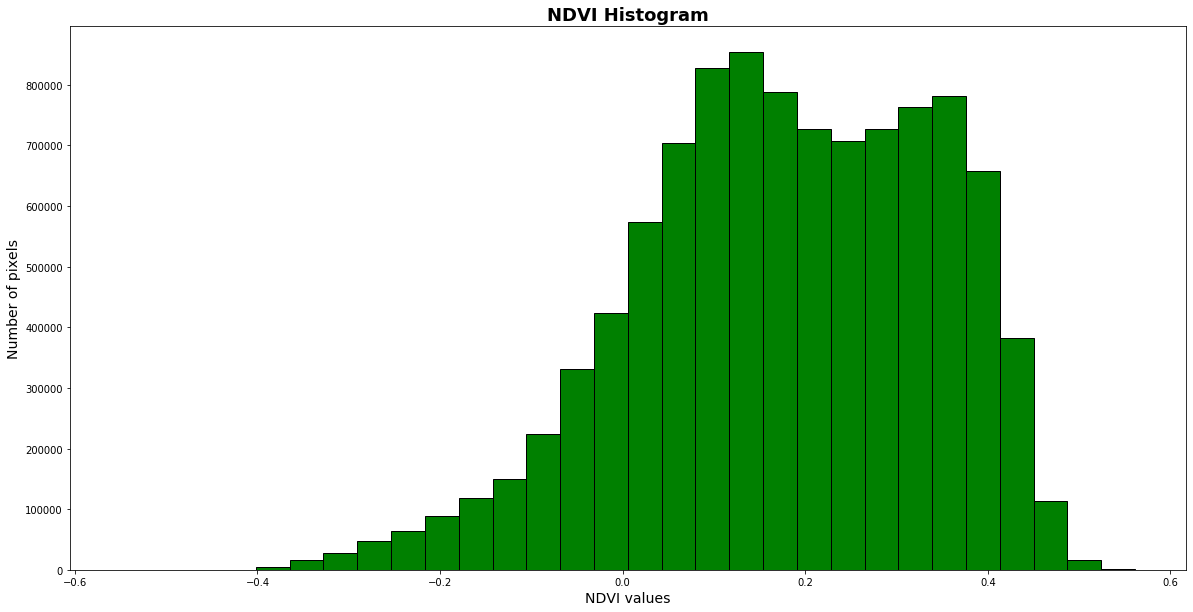

In [22]:
# Define a new figure
fig2 = plt.figure(figsize=(20,10))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


# For the x-axis, we want to count every pixel that is not an empty value
x = ndvi[~numpy.isnan(ndvi)]
color = 'g'
# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

# Save the generated figure to an external image file
#fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)


plt.show()